In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Cargar los datos procesados del notebook anterior
data = pd.read_csv('processed_data.csv')

# Mostrar las primeras filas del dataset
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.00,2,2,1,24,2,2,-1,-1,...,0.00,0.00,0.00,0.00,689.00,0.00,0.00,0.00,0.00,1
1,2,120000.00,2,2,2,26,-1,2,0,0,...,3272.00,3455.00,3261.00,0.00,1000.00,1000.00,1000.00,0.00,2000.00,1
2,3,90000.00,2,2,2,34,0,0,0,0,...,14331.00,14948.00,15549.00,1518.00,1500.00,1000.00,1000.00,1000.00,5000.00,0
3,4,50000.00,2,2,1,37,0,0,0,0,...,28314.00,28959.00,29547.00,2000.00,2019.00,1200.00,1100.00,1069.00,1000.00,0
4,5,50000.00,1,2,1,57,-1,0,-1,0,...,20940.00,19146.00,19131.00,2000.00,36681.00,10000.00,9000.00,689.00,679.00,0


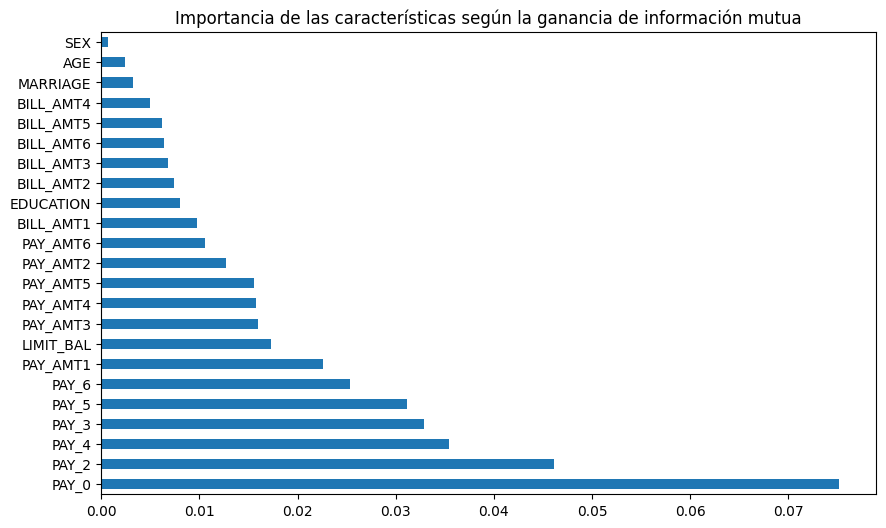

In [2]:
# Seleccionar características y la variable objetivo
X = data.drop(columns=['default.payment.next.month', 'ID'])  # Quitar la variable objetivo y la columna ID
y = data['default.payment.next.month']

# Calcular la ganancia de información mutua
mutual_info = mutual_info_classif(X, y)

# Mostrar la importancia de las características
importances = pd.Series(mutual_info, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6))
plt.title("Importancia de las características según la ganancia de información mutua")
plt.show()


In [4]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [5]:
# Crear y ajustar el LazyClassifier para probar múltiples modelos
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Mostrar el rendimiento de los diferentes modelos
models



 97%|████████████████████████████████████████████████████████████████████████████████████████████████▊   | 30/31 [14:10<00:12, 12.74s/it]

[LightGBM] [Info] Number of positive: 5332, number of negative: 18668
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3274
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222167 -> initscore=-1.253084
[LightGBM] [Info] Start training from score -1.253084


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [14:11<00:00, 27.46s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.71,0.69,0.69,0.73,0.03
LGBMClassifier,0.82,0.66,0.66,0.80,0.38
ExtraTreesClassifier,0.82,0.66,0.66,0.80,1.57
XGBClassifier,0.82,0.66,0.66,0.80,0.25
RandomForestClassifier,0.82,0.66,0.66,0.80,4.45
NearestCentroid,0.65,0.65,0.65,0.68,0.02
SVC,0.82,0.65,0.65,0.80,10.37
BaggingClassifier,0.80,0.64,0.64,0.79,2.25
AdaBoostClassifier,0.82,0.64,0.64,0.79,1.27
